民主党のオバマ候補と、共和党のロムニー候補の争いで、オバマ候補が勝利しました。
最初は、世論調査結果のデータを扱います。以下のような問題を設定してみましょう。

1.) どのような人達が調査対象だったか？

2.) 調査結果は、どちらの候補の有利を示しているか？

3.) 態度未定の人達が世論調査に与えた影響は？

4.) また、態度未定の人たちの動向は？

5.) 投票者の気持ちは、時間ともにどう変化したか？

6.) 討論会の影響を世論調査の結果から読み取ることができるか？

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
%matplotlib inline

In [4]:
#webからデータを取得するためにrequestsをインポート
import requests

#CSVとして扱うためにStringIOを使う
from io import StringIO

In [5]:
# データのURLです。
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# requestsをつかってデータをtextとして取得します。
source = requests.get(url).text

# StringIOを使ってpandasのエラーを防ぎます。
poll_data = StringIO(source) 

In [6]:
poll_df = pd.read_csv(poll_data)

In [7]:
#世論調査の結果データ
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [14]:
#世論調査の主体とその支持政党を見る
poll_df[['Pollster', 'Partisan', 'Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
122,Bloomberg,Nonpartisan,None
63,CBS,Nonpartisan,None
415,CBS/Times,Nonpartisan,None
504,CNN,Nonpartisan,None
568,Clarus,Nonpartisan,None


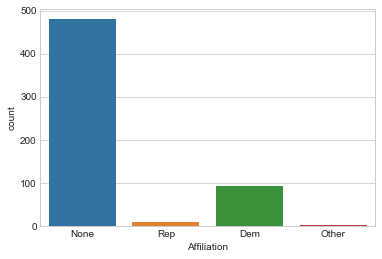

In [15]:
#affiliationで分類
sns.countplot('Affiliation', data=poll_df)

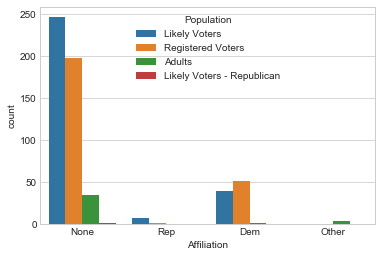

In [22]:
#調査主体の支持政党を、調査対象で層別化
sns.countplot('Affiliation', data=poll_df, hue='Population')

オバマ、ロムニー、未定の3つの選択肢について、それぞれ平均的な支持率を計算する

In [49]:
avg = pd.DataFrame(poll_df.mean())

In [50]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [51]:
#不要な行を削除
avg = avg.loc[['Obama', 'Romney', 'Undecided']]

In [52]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [45]:
#標準偏差を計算
std = pd.DataFrame(poll_df.std())

In [46]:
std

,0
Number of Observations,1621.268369
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


In [47]:
#不要な行を削除
std = std.loc[['Obama', 'Romney', 'Undecided']]

In [48]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


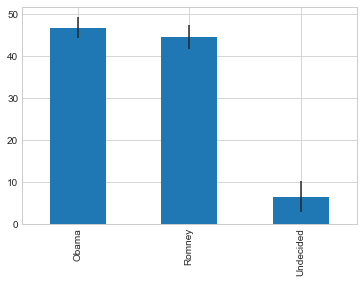

In [53]:
avg.plot(yerr=std, kind='bar', legend=False)

In [56]:
poll_avg = pd.concat([avg,std], axis=1)
poll_avg.columns = ['Average', 'STD']

In [57]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


選挙戦の推移を見る。

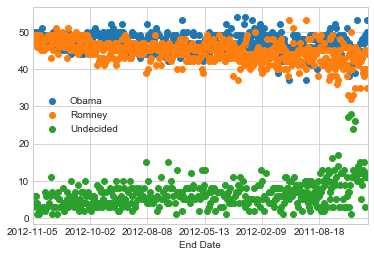

In [58]:
#両候補支持と態度未定の人の割合をプロット
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], marker='o', linestyle='')

In [59]:
#時系列で並べるため、datetimeモジュールを使う
from datetime import datetime

In [65]:
#オバマとロムニーの支持率の差を計算し、新しい列に入れる
poll_df['Difference'] = (poll_df.Obama- poll_df.Romney)/100

In [66]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Differnce,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09,0.09


In [67]:
#支持率の差を時系列で見る。同じ期間に行われた調査をgroupbyでまとめる
#as_index=Falseにすると、indexを0,1,2の形で保持
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

In [68]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Differnce,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09,0.09


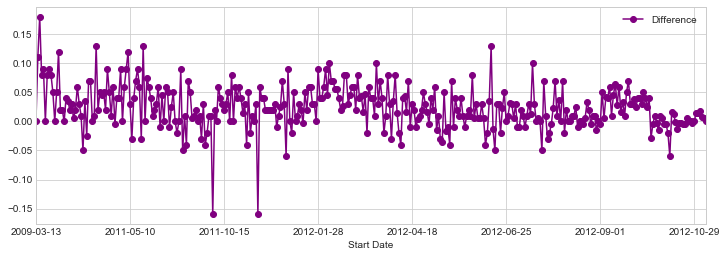

In [69]:
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple')

In [71]:
#討論会の日付を描き込む
#10月のデータだけ指定する
poll_df[poll_df['Start Date'].apply(lambda x:x.startswith('2012-10'))]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Differnce,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,0.025000,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,0.040000,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000,-0.005000


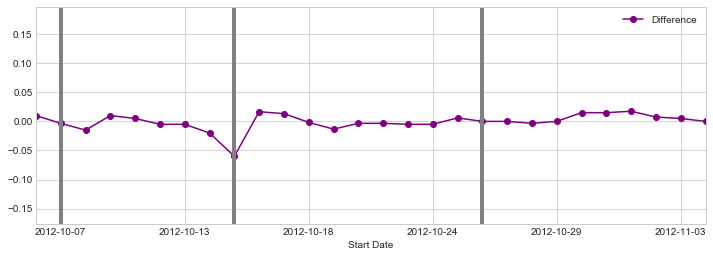

In [73]:
#10月だけのプロット
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim=(329,356))

#討論会の日付
plt.axvline(x=330, linewidth=4, color='grey')
plt.axvline(x=337, linewidth=4, color='grey')
plt.axvline(x=347, linewidth=4, color='grey')